In [10]:
from autodistill_grounded_sam import GroundedSAM
from autodistill.detection import CaptionOntology
from autodistill_yolov8 import YOLOv8
from autodistill_roboflow_universe import RoboflowUniverseModel
from autodistill.utils import plot
import supervision as sv
import cv2

In [7]:
# define an ontology to map class names to our GroundingDINO prompt
# the ontology dictionary has the format {caption: class}
# where caption is the prompt sent to the base model, and class is the label that will
# be saved for that caption in the generated annotations
model_configs = [
    ("carplates-bi5bk", 1)
]

base_model = RoboflowUniverseModel(
    ontology=CaptionOntology(
        {
            "licence": "licence",
        }
),
    api_key="JowxUFgbZ4P1EuEjdMi1",
    model_configs=model_configs,
)

# label all images in a folder called `context_images`
base_model.label(
  input_folder="./images",
  output_folder="./dataset"
)


loading Roboflow workspace...
loading Roboflow project...


Labeling images: 0it [00:00, ?it/s]

Labeled dataset created - ready for distillation.


DetectionDataset(classes=['licence'], images={}, annotations={})

In [4]:

target_model = YOLOv8("yolov8n.pt")
target_model.train("./dataset/data.yaml", epochs=200)



loading Roboflow workspace...
loading Roboflow project...


Labeling images: 0it [00:00, ?it/s]


Labeled dataset created - ready for distillation.


New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.81 🚀 Python-3.9.19 torch-2.3.0+cu121 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./dataset/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=

FileNotFoundError: /media/hapek/SSD/OneDrive - Politechnika Wroclawska/Magisterka/dataset/valid/your-image.jpg does not exist


image 1/1 /mnt/e/OneDrive - Politechnika Wroclawska/Magisterka/dataset/valid/Cars10.jpg: 640x640 2 cars, 16.5ms
Speed: 1.2ms preprocess, 16.5ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)
annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


[ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: '

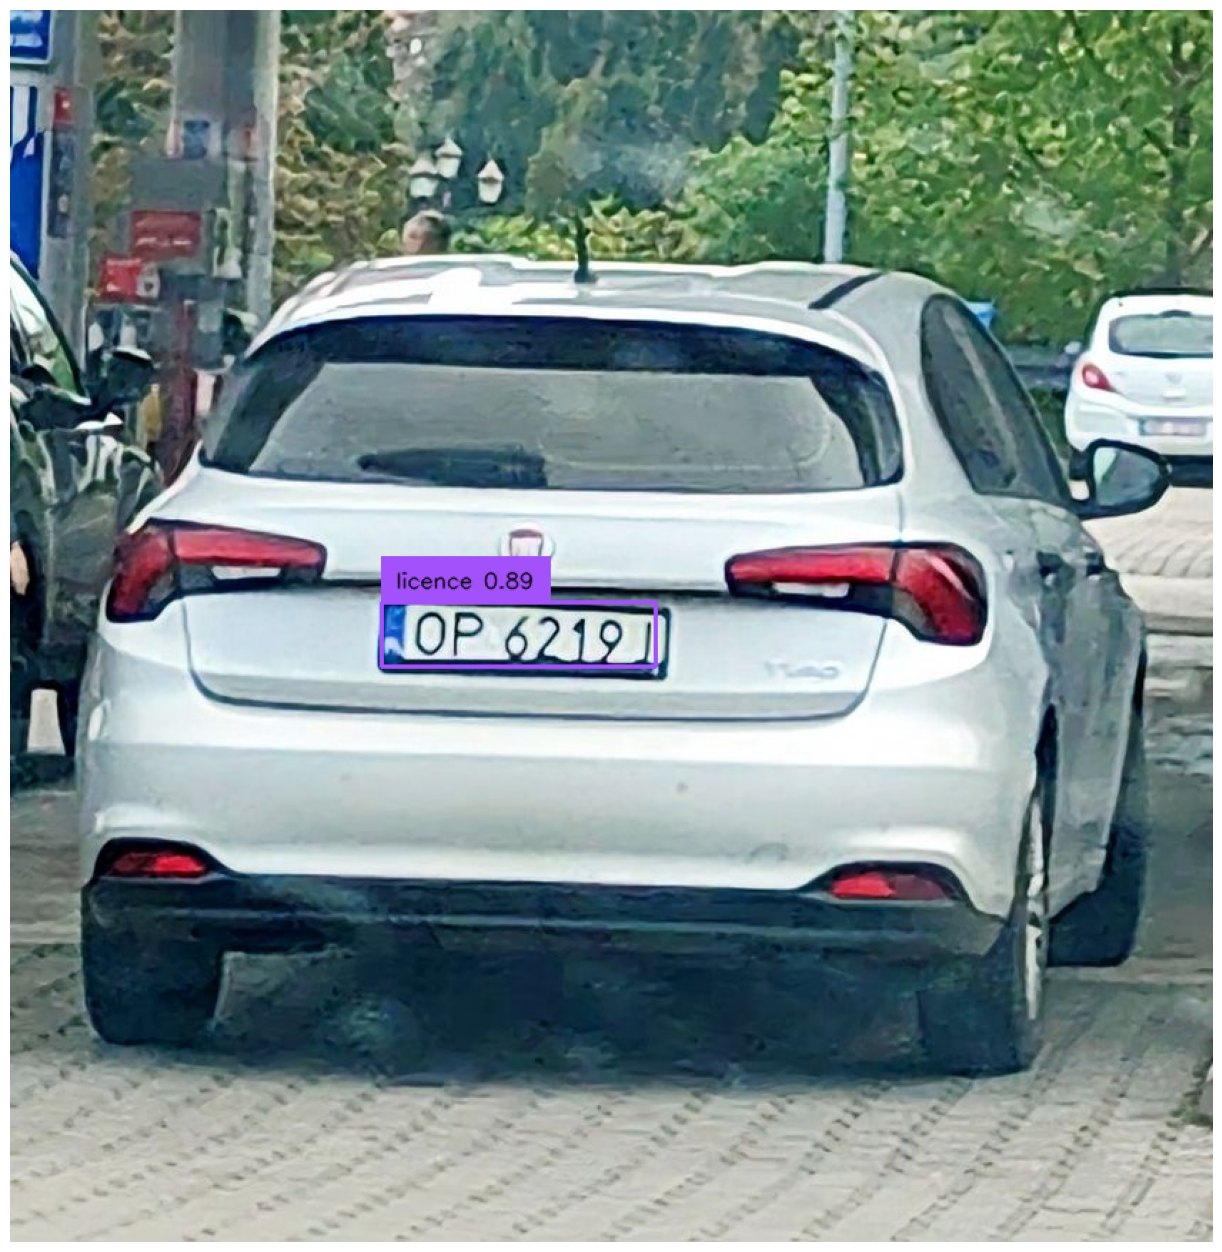

In [11]:
# run inference on the new model
target_model = YOLOv8("yolov8n.pt")
pred = target_model.predict("./dataset/valid/Cars10.jpg", confidence=0.5)
print(pred)
# annotate image with detections
box_annotator = sv.BoxAnnotator()

labels = [
    f"{base_model.ontology.classes()[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _, _ in detections
]

annotated_frame = box_annotator.annotate(
    scene=image.copy(), detections=detections, labels=labels
)

sv.plot_image(annotated_frame, (16, 16))

from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.22.0`. Use `Detections.from_inference` instead.
annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


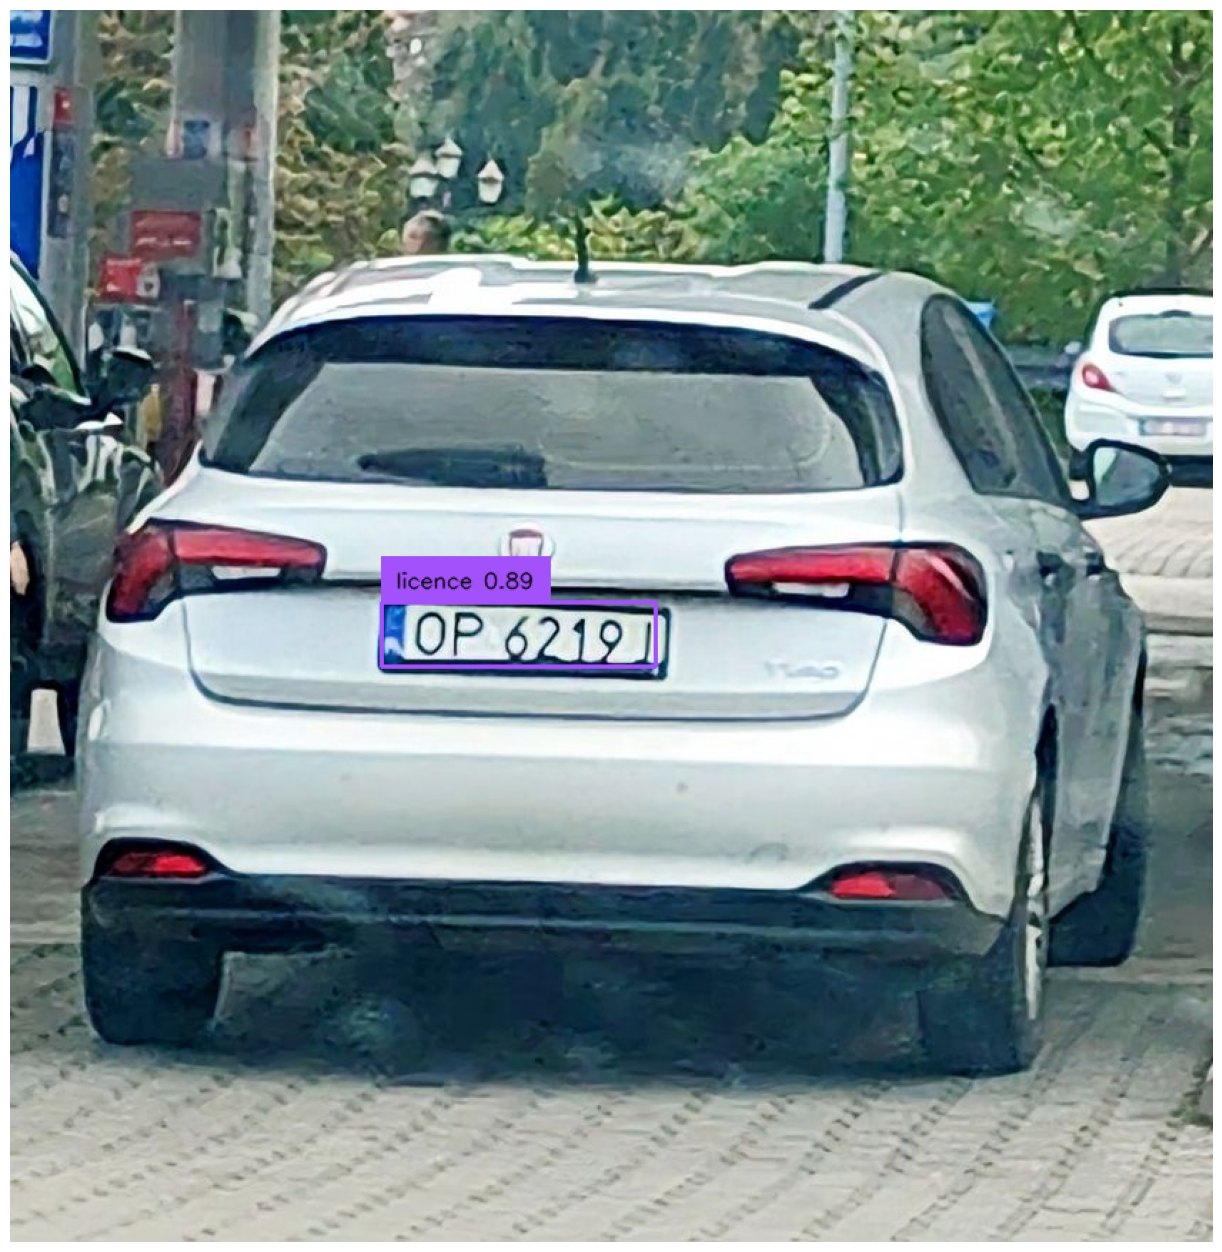

In [8]:


img_path = "./dataset/valid/Cars10.jpg"

image = cv2.imread(img_path)

detections = base_model.predict(img_path)
# annotate image with detections
box_annotator = sv.BoxAnnotator()

labels = [
    f"{base_model.ontology.classes()[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _, _ in detections
]

annotated_frame = box_annotator.annotate(
    scene=image.copy(), detections=detections, labels=labels
)

sv.plot_image(annotated_frame, (16, 16))